In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

PATH = '/home/tbrownex/data/Hackett/JLP/UseCase2/'
FILE = 'BranchSalesDriver'

In [9]:
def regress(x,y):
    d = {}
    regr    = linear_model.LinearRegression()
    lr      = regr.fit(x, y)
    d["m"]  = lr.coef_[0]
    d["b"]  = lr.intercept_
    d["R2"] = lr.score(x, y)
    d["y_"] = lr.predict(x)
    return d

In [23]:
def showResults(x, y, model):
    print("Slope is:     {:.2f}".format(model["m"][0]))
    print("Intercept is: {:,.0f}".format(model["b"][0]))
    print("R-squared is: {:.2f}".format(model["R2"]))
    plt.scatter(x/1000, y/1000)
    plt.show()

In [24]:
df = pd.read_csv(PATH+FILE)

ppc          = df["PPC Spend"]
onlineSales  = df["Online Sales"]

ppc   = np.array(ppc).reshape([-1,1])
os    = np.array(onlineSales).reshape([-1,1])

# Get the data sorted by ppc for plotting
idx = np.array(ppc).argsort(axis=0).reshape([-1,])

##### Process the actual data first

Slope is:     5.63
Intercept is: 2,806,400
R-squared is: 0.28


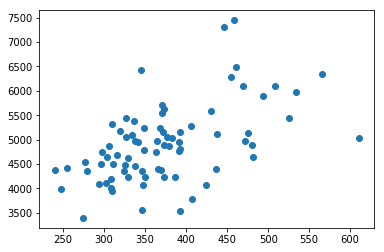

In [38]:
ppc   = ppc[idx]
os    = os[idx]
model = regress(ppc, os)
showResults(ppc, os, model)

m = model["m"]
b = model["b"]

##### Now generate a lower R-squared set of data to compare

Slope is:     5.64
Intercept is: 2,774,342
R-squared is: 0.65


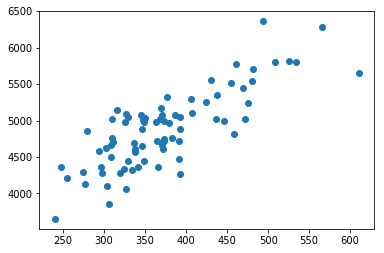

In [42]:
noise = 100000*np.random.normal(scale=3.0, size=[78,1])
osNew = b + m*ppc + noise
model = regress(ppc, osNew)
showResults(ppc, osNew, model)